## Copyright notice

*All material not in the public domain is subject to copyright
(University of Cambridge and/or its licensors) and is licensed for
personal / professional education use only.*


# Broken MLP

Can you find the five bugs in the following code?


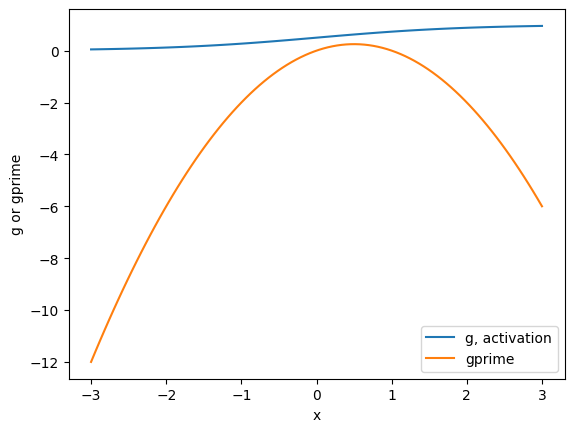

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

def g(x):
    return ( 1.0 /  (1.0 + math.exp(-x) ))

def gprime(x):
    return ( x * (1-x) )


## check these are the right shape.

xs = np.linspace(-3, 3, 100)
gs = [g(x) for x in xs]
gps = [gprime(x) for x in xs]

plt.ion()
plt.clf()
plt.xlabel("x")
plt.ylabel("g or gprime")
plt.plot(xs, gs,  label="g, activation")
plt.plot(xs, gps,  label="gprime")
plt.legend()
plt.show()

## Training data and constants

In [2]:
bias = 0                       # value of bias unit

epsilon = 0.5

data = np.array([[0, 0, bias, 0],
                 [0, 1, bias, 1],
                 [1, 0, bias, 1],
                 [1, 1, bias, 0],
                 ]
                )

targets = data[:,3]
inputs = data[:,0:3]

## Network architecture

In [3]:
ninputs = inputs.shape[0]

I=2                             # number of input units, excluding bias
J=2                             # number of hidden units, excluding bias
K=1                             # only one output unit

## Weight matrices

W1 = np.random.rand(J,I+1)
W2 = np.random.rand(K,J+1)


y_j = np.zeros(J+1)             # outputs of hidden units
delta_j = np.zeros(J)           # delta for hidden units

nepoch = 2000
errors = np.zeros(nepoch)

## Training

In [4]:
for epoch in range(nepoch):

    ## accumulate errors for weight matrices
    DW1 = np.zeros(W1.shape)
    DW2 = np.zeros(W2.shape)
    epoch_err = 0.0

    for i in range(ninputs):

        ## Step 1. Forward propagation activity, adding
        ## bias activity along the way.


        ## 1a - input to hidden
        y_i = inputs[i,:]
        a_j = np.matmul(W1, y_i)

        for q in range(J):
            y_j[q] = g( a_j[q] )

        y_j[J] = bias

        ## 1b - hidden to output
        a_k = np.matmul(W2, y_j)
        y_k = a_k

        ## 1c - compare output to target
        t_k  = targets[i]
        error = np.sum(0.5 * (t_k - y_k)**2 )
        epoch_err += error

        ## Step 2.  Back propagate activity, calculating
        ## errors and dw along the way.


        ## 2a - output to hidden
        delta_k = gprime(a_k) 
        for q in range(J+1):
            ##for r in range(K):
            r=0
            DW2[r,q] += y_j[q] * delta_k
                
            
        ## 2b - calculate delta for hidden layer

        for q in range(J):
            delta_j[q] = gprime(a_j[q]) * delta_k * W2[0,q]

        ## 2c - calculate error for input to hidden weights
        for p in range(I+1):
            for q in range(J):
                DW1[q,p] += y_i[p] 


    ## end of an epoch - now update weights
    errors[epoch] = epoch_err
    if ( epoch % 50)== 0:
        print(f'Epoch {epoch} error {epoch_err:.4f}')

    W1 = W1 + (epsilon*DW1)
    W2 = W2 + (epsilon*DW2)
        
## how has it worked?

Epoch 0 error 0.5016
Epoch 50 error nan
Epoch 100 error nan
Epoch 150 error nan
Epoch 200 error nan
Epoch 250 error nan
Epoch 300 error nan
Epoch 350 error nan
Epoch 400 error nan
Epoch 450 error nan
Epoch 500 error nan
Epoch 550 error nan
Epoch 600 error nan
Epoch 650 error nan
Epoch 700 error nan
Epoch 750 error nan
Epoch 800 error nan
Epoch 850 error nan
Epoch 900 error nan
Epoch 950 error nan
Epoch 1000 error nan
Epoch 1050 error nan
Epoch 1100 error nan
Epoch 1150 error nan
Epoch 1200 error nan
Epoch 1250 error nan
Epoch 1300 error nan
Epoch 1350 error nan
Epoch 1400 error nan
Epoch 1450 error nan
Epoch 1500 error nan
Epoch 1550 error nan
Epoch 1600 error nan
Epoch 1650 error nan
Epoch 1700 error nan
Epoch 1750 error nan
Epoch 1800 error nan
Epoch 1850 error nan
Epoch 1900 error nan
Epoch 1950 error nan


/var/folders/dk/h27sxrrj3mg6myd8ht0ym9300000gn/T/ipykernel_25115/1056693143.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  DW2[r,q] += y_j[q] * delta_k
/var/folders/dk/h27sxrrj3mg6myd8ht0ym9300000gn/T/ipykernel_25115/1056693143.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  delta_j[q] = gprime(a_j[q]) * delta_k * W2[0,q]
/var/folders/dk/h27sxrrj3mg6myd8ht0ym9300000gn/T/ipykernel_25115/1056693143.py:29: RuntimeWarning: overflow encountered in square
  error = np.sum(0.5 * (t_k - y_k)**2 )
/var/folders/dk/h27sxrrj3mg6myd8ht0ym9300000gn/T/ipykernel_25115/2539934917.py:9: RuntimeWarning: overflow encountered in multiply
  return (